## <center>Disordered and complex systems</center>

# <center>Phase transition in the Ising model.</center>

**Author:** João António - joaoantant@gmail.com \& github.com/JoaoAnt/.

**Based on:** the instructions for Project 4 from professor Alexander V. Goltsev.

**Note:**
For simplicity, in the graphs, I have used the color "**IndianRed**","**MediumOrchid**" and "**DarkCyan**" when it is a value obtained through this simulation and have used the color "**RoyalBlue**" for theoretical predictions. I have also used the notation M Teor. and $\chi$ Teor. for the theoretical predictions and used M and $\chi$ for the simulated ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ising model on the ring
The energy of the Ising model on a ring is
\begin{equation}
E=-J \sum_{n-1}^{N}S_nS_{n+1}-H\sum_{n=1}^N S_n,
\end{equation}

where $S_n=\pm 1$, $S_{N+1}=S_1$ and $J$ is the exchange integral.

The energy of spin $S_n$ interacting with nearest-neighbouring spins in a magnetic field H is:

\begin{equation}
E_n(S_n)=-JS_n(S_{n-1}+S_{n+1})-HS_n.
\end{equation}

To calculate the magnetization I have used:

\begin{equation}
M^{(\alpha)} = \frac{1}{N} \sum_{n=1}^N S_n^{(\alpha)},
\end{equation}

where $\alpha$ is the counter of microstates, goes from 1 until m.

And lastly, to calculate the average over microstates:

\begin{equation}
<M>=\frac{1}{m}\sum_{\alpha=1}^m M^{(\alpha)}.
\end{equation}

All this equations where used as functions, except the first one.

**Find the temperature dependence of the magnetization.**

### Functions Used

In [2]:
def calcEnergy(spin,RaSpin):
    '''Energy of a given configuration'''
    energy = -J*spin[RaSpin]*(spin[(RaSpin-1)%N]+spin[(RaSpin+1)%N])-H*spin[RaSpin]
    return energy

def calcMag(spin):
    '''Magnetization of a given configuration'''
    mag = 1/N*np.sum(spin)
    return mag

def calcAvMag(Magn,K):
    '''Calculate the average magnetization for a given K'''
    AvMag = 1/(K*100)*np.sum(Magn[100:K*100])
    return AvMag

### Input Table

| Parameters 	| Symbol 	| = 	| Value 	|
|:-------------------------------:	|:---------:	|:-:	|:---------:	|
| Exchange integral 	| J 	| = 	| 1 	|
| Number of spins 	| N 	| = 	| 1000 	|
| Number of generated microstates 	| m 	| = 	| 100 000 	|
| Temperature range 	| T 	| = 	| [0.1, 10] 	|
| Temperature step 	| $\Delta$T 	| = 	| 0.05 	|
| Magnetic field 	| H 	| = 	| 0.1 	|

In [3]:
J=1
N=1000
m=100000
deltaT=0.05
T=0.1
Tfin=10
H=0.1

### Initializing variables that vary with T

In [4]:
AverageMagn=np.zeros(int(m/100))
AverageMagnA=np.zeros(int(m/100))
AverageMagnB=np.zeros(int(m/100))
AverageMagn2=np.zeros(int((Tfin-T)/deltaT))
FinalMagn=np.zeros(int((Tfin-T)/deltaT))

### Metropolis algorithm and average magnetization calculus

In [5]:
for count in range(int((Tfin-T)/deltaT)):
    
    #Initial Conditions
    Spins=np.ones(N)
    Magn=np.ones(m)

    for alpha in range(m):
        #Metropolis Algorithm
        RaSpin=np.random.randint(0,N-1)
        Old=calcEnergy(Spins,RaSpin)
        Spins[RaSpin]*=-1
        EnergyDiference=calcEnergy(Spins,RaSpin)-Old
    
    #if EnergyDiference<=0:        #Do Nothing
        if EnergyDiference>0:
            w=np.exp(-1/T*EnergyDiference)
            r=np.random.uniform(0, 1)
        #if r<=w:            #Do Nothing
            if r>w:
                Spins[RaSpin]*=-1
        Magn[alpha]=calcMag(Spins)
    
    #Data for the 1st Plot
    if T==0.1:
        for K in range(2,int(m/100)):
            AverageMagn[K]=calcAvMag(Magn,K)
    if round(T,3)==1:
        for K in range(2,int(m/100)):
            AverageMagnA[K]=calcAvMag(Magn,K)
    if round(T,3)==2:
        for K in range(2,int(m/100)):
            AverageMagnB[K]=calcAvMag(Magn,K)
    #Data for 2nd plot
    AverageMagn2[count]=calcAvMag(Magn,N)
    FinalMagn[count]=Magn[-1]
    T+=0.05;

### Plotting the data
### Average Magnetization vs Microstates

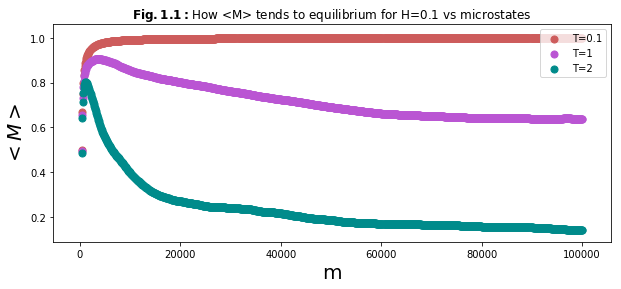

In [6]:
f = plt.figure(figsize=(10, 4));
X = np.linspace(2*100, N*100, 1000);
plt.scatter(X[2:], AverageMagn[2:], s=50, marker='o', color='IndianRed', label='T=0.1')
plt.scatter(X[2:], AverageMagnA[2:], s=50, marker='o', color='MediumOrchid', label='T=1')
plt.scatter(X[2:], AverageMagnB[2:], s=50, marker='o', color='DarkCyan', label='T=2')
plt.xlabel("m", fontsize=20);
plt.ylabel("$<M>$", fontsize=20);
plt.axis('tight');
plt.legend(loc="upper right");
plt.title(r"$\bf{Fig.1.1:}$"+'How <M> tends to equilibrium for H=0.1 vs microstates')
plt.show()

In $\bf{Fig.1.1}$ it is possible to see how the average magnetization ($<M>$) varies with the microstates ($m$). As we can see for values below the critical temperature (T=0.1) it seems to stabilize near the value of 1, and as we increase the temperature until the critical temperature, the more microstates it takes to stabilize, and stabilizes at a lower value than previous. Lastly we have the value of (T=2) where we can see that after the critical temperature the average magnetization stabilizes for even smaller values.

### Magnetization vs Temperature

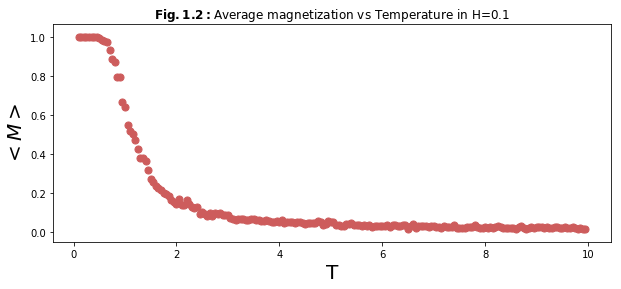

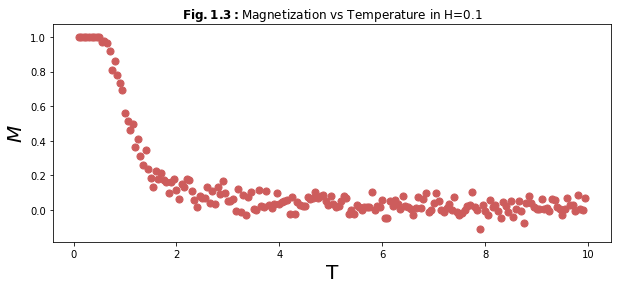

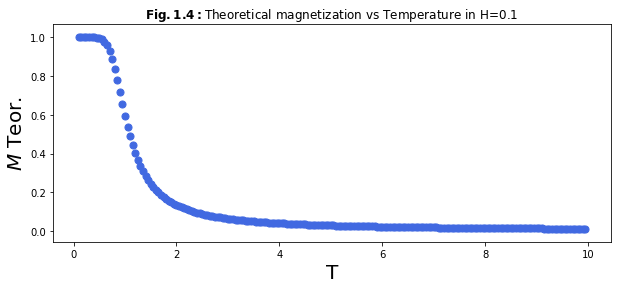

In [7]:
f = plt.figure(figsize=(10, 4));
T = np.arange(0.1, 10, 0.05); 
plt.scatter(T, AverageMagn2, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$<M>$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.1.2:}$"+'Average magnetization vs Temperature in H=0.1')

f = plt.figure(figsize=(10, 4));
T = np.arange(0.1, 10, 0.05); 
plt.scatter(T, FinalMagn, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$M$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.1.3:}$"+'Magnetization vs Temperature in H=0.1')

f = plt.figure(figsize=(10, 4));
Magn2T=np.sinh(1/T*H)/(np.sqrt((np.sinh(1/T*H))**2+np.exp(-4*1/T*J)))
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$M$ Teor.", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.1.4:}$"+'Theoretical magnetization vs Temperature in H=0.1');
plt.show()

In the next $\bf{Fig.1.2}$ it is possible to see the average magnetization vs Temperature obtained through the simulation, this one is the one that should be compared to $\bf{Fig.1.4}$ where we have the theoretical prediction of the magnetization vs temperature for the same H.

In the $\bf{Fig.1.3}$ we can see the magnetization vs temperature obtained through simulation, despite having more or less the same behavior as the other two just mentioned, it has more noise to the curve (more fluctuations), since the minimum of energy is very unstable, all states have a certain probability of being visited even if they are not the minimum energy state.

As this is a simple one dimensional Ising Model, there is no phase transition.

### Magnetizations vs Temperature

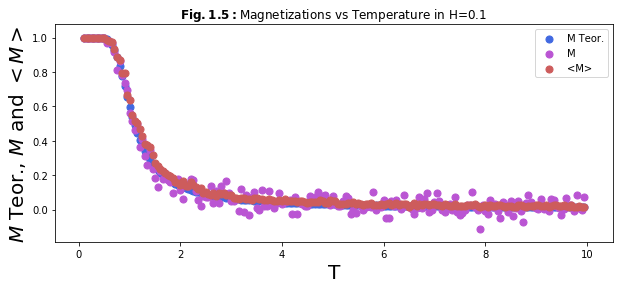

In [8]:
f = plt.figure(figsize=(10, 4));
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue',label='M Teor.')
plt.scatter(T, FinalMagn, s=50, marker='o', color='MediumOrchid',label='M')
plt.scatter(T, AverageMagn2, s=50, marker='o', color='IndianRed',label='<M>')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$M$ Teor., $M$ and $<M>$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.1.5:}$"+'Magnetizations vs Temperature in H=0.1');
plt.legend(loc="upper right");
plt.show()

In this $\bf{Fig.1.5:}$ we can see that the M Teor. and the $<M>$ have the same behaviour, like explained previously, and the M as nearly the same also, but with a lot more noise.

It is harder to see but the $<M>$ is slightly more to the right when compared to the M Teor., this is a effect of a non-infinite system and non-infinite time, if we had infinite time and infinite size system the curves would coincide perfectly.

# Ising model with all-to-all interaction (long-ranged interaction)

The energy of the Ising model with the long-ranged interaction is:

\begin{equation}
E=\frac{-J}{N}\sum_{n=1}^{N-1}\sum_{m=n+1}^N S_nS_m -H\sum_{n=1}^N S_n,
\end{equation}

where $S_n=\pm1$ and J is the exchange integral again.

The energy of spin $S_n$ interacting with the other spins in a magnetic
field H is:

\begin{equation}
E_n(S_n)=\frac{-J}{N}S_n\sum_{m=1, m\neq n}^N S_m-HS_n.
\end{equation}

To calculate the magnetization in the microstate $\alpha$ (goes from 1 untill m), I have used:

\begin{equation}
M^{(\alpha)} = \frac{1}{N} \sum_{n=1}^N S_n^{(\alpha)}.
\end{equation}

To calculate the average over microstates:

\begin{equation}
<M>=\frac{1}{m}\sum_{\alpha=1}^m M^{(\alpha)}.
\end{equation}

To calculate the susceptability:
\begin{equation}
\chi ^{(\alpha)}=\frac{N}{T} (\frac{1}{m}\sum_{\alpha=1}^{m}(M^{(a)})^2-<M>^2)
\end{equation}

All this equations where used as functions.

 Plot M and $\chi$ versus T. Analyse a temperature dependence of M and $\chi$ near the critical point T_c = J.

### Functions Used

In [9]:
def calcEnergy(spin,RaSpin):
    '''Energy of a given configuration'''
    energy = -J/N*spin[RaSpin]*(spin.sum()-spin[RaSpin])-H*spin[RaSpin]
    return energy

def calcMag(spin):
    '''Magnetization of a given configuration'''
    mag = 1/N*np.sum(spin)
    return mag

def calcAvMag(Magn):
    '''Calculate the average magnetization'''
    AvMag = 1/m*np.sum(Magn)
    return AvMag

def calcSusc(Magn,AvMag):
    '''Calculate the average magnetization'''
    Temp=0
    for alpha in range(m):
        Temp+=Magn[alpha]**2
    susc=N/T*(1/m*Temp-AvMag**2)
    return susc

### Input Table

| Parameters 	| Symbol 	| = 	| Value 	|
|:-------------------------------:	|:---------:	|:-:	|:---------:	|
| Exchange integral 	| J 	| = 	| 1 	|
| Number of spins 	| N 	| = 	| 1000 	|
| Number of generated microstates 	| m 	| = 	| 50 000 	|
| Temperature range 	| T 	| = 	| [0.1, 10] 	|
| Temperature step 	| $\Delta$T 	| = 	| 0.05 	|
| Magnetic field 	| H 	| = 	| 0 and 0.001 	|

In [10]:
J=1
N=1000
m=50000
deltaT=0.05
T=0.1
Tfin=10
H=0

## Using H=0
### Initializing variables that vary with T

In [11]:
AvMag2=np.zeros(int((Tfin-T)/deltaT))
Suscp2=np.zeros(int((Tfin-T)/deltaT))

### Metropolis algorithm, average magnetization and susceptibility calculus

In [12]:
for count in range(int((Tfin-T)/deltaT)):
    
    #Initial Conditions
    Spins=np.ones(N)
    Magn=np.ones(m)

    for alpha in range(m):
        #Metropolis Algorithm
        RaSpin=np.random.randint(0,N-1)
        Old=calcEnergy(Spins,RaSpin)
        Spins[RaSpin]*=-1
        EnergyDiference=calcEnergy(Spins,RaSpin)-Old
    
    #if EnergyDiference<=0:        #Do Nothing
        if EnergyDiference>0:
            w=np.exp(-1/T*EnergyDiference)
            r=np.random.uniform(0, 1)
        #if r<=w:            #Do Nothing
            if r>w:
                Spins[RaSpin]*=-1
        Magn[alpha]=calcMag(Spins)
            
    #Data for 2nd plot
    AvMag2[count]=calcAvMag(Magn)
    Suscp2[count]=calcSusc(Magn,AvMag2[count])
    T+=0.05;    

### Plotting the data
### Magnetization vs Temperature

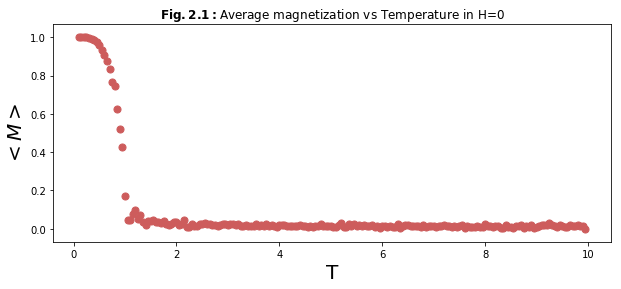

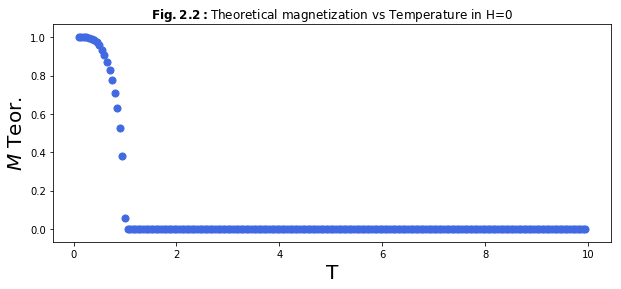

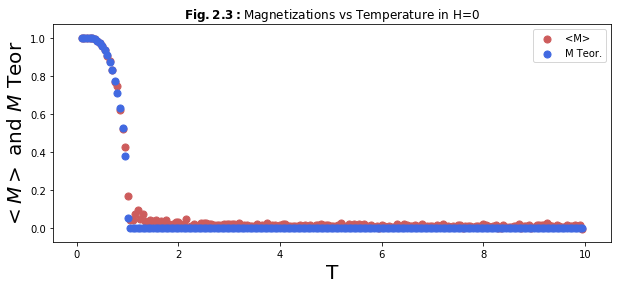

In [13]:
f = plt.figure(figsize=(10, 4));
T = np.arange(0.1, 10, 0.05); 
plt.scatter(T, AvMag2, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$<M>$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.1:}$"+'Average magnetization vs Temperature in H=0')

f = plt.figure(figsize=(10, 4));
Magn2T=1
for i in range(500):
    Magn2T=np.tanh(1/T*J*Magn2T+1/T*H)
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$M$ Teor.", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.2:}$"+'Theoretical magnetization vs Temperature in H=0');
plt.show()

f = plt.figure(figsize=(10, 4));
plt.scatter(T, AvMag2, s=50, marker='o', color='IndianRed',label='<M>')
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue',label='M Teor.')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$<M>$ and $M$ Teor", fontsize=20);
plt.axis('tight');
plt.legend(loc="upper right");
plt.title(r"$\bf{Fig.2.3:}$"+'Magnetizations vs Temperature in H=0')
plt.show()

In the next $\bf{Fig.2.1}$ it is possible to see the average magnetization vs temperature obtained through the simulation, to be compared to $\bf{Fig.2.2}$ where we have the theoretical prediction of the magnetization vs temperature for the same H.

For the theoretical value of magnetization, since it is a recursive equation, I have iterated it over 500 times, to obtain the values that are plotted.

Lastly in $\bf{Fig.2.3}$ I have placed both curves in the same plot, as we can see the transition is not as sharp in the simulation as it is predicted, this is once more an effect of non-infinite size and non-infinite time.

### Susceptibility vs Temperature

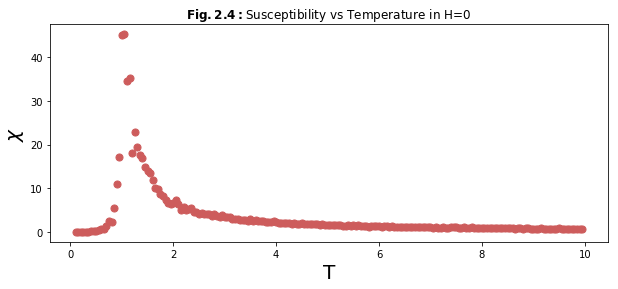

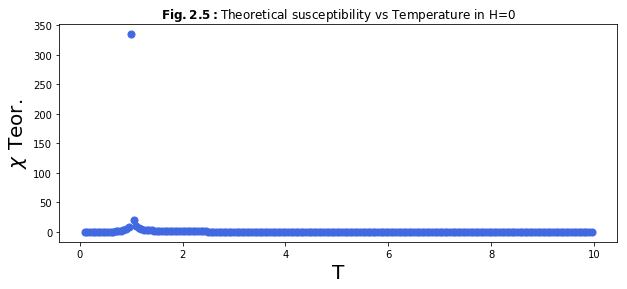

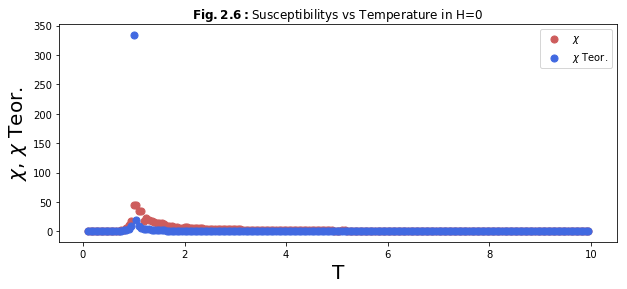

In [14]:
f = plt.figure(figsize=(10, 4));
plt.scatter(T, Suscp2, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$\chi$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.4:}$"+'Susceptibility vs Temperature in H=0')
plt.show()

f = plt.figure(figsize=(10, 4));
SuscpT=1/T/(np.cosh(1/T*J*Magn2T+H/T)**2-J/T)
plt.scatter(T, SuscpT, s=50, marker='o', color='RoyalBlue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$\chi$ Teor.", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.5:}$"+'Theoretical susceptibility vs Temperature in H=0');
plt.show()

f = plt.figure(figsize=(10, 4));
plt.scatter(T, Suscp2, s=50, marker='o', color='IndianRed',label='$\chi$')
plt.scatter(T, SuscpT, s=50, marker='o', color='RoyalBlue',label='$\chi$ Teor.')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$\chi$, $\chi$ Teor.", fontsize=20);
plt.axis('tight');
plt.legend(loc="upper right");
plt.title(r"$\bf{Fig.2.6:}$"+'Susceptibilitys vs Temperature in H=0')
plt.show()

In the $\bf{Fig.2.4}$ I have plotted the susceptibility vs temperature for a H equal to zero. In the $\bf{Fig.2.5}$ we have the theoretical prediction, this two images are relative similar despite being a bit different near the critical temperature, this shows that near the critical temperature the system is even more unstable.

With the all to all interaction is now possible to see the phase transitions at the $T_c$ in this case in $T_c$ is in $T=1$, the magnetization shows a simple phase transition that is continuous, as for the susceptibility it also presents a phase transition, but this time is not a continuous one, the susceptibility in the $T_c$ goes to infinity.

Once more I have created the combination of the curves in $\bf{Fig.2.6}$, where we can see once more the $<M>$ going more to the left than the theoretical, but also this peak of magnetization has more width than the theoretical one, so it also goes more to the right, i.e., takes more temperature than the theoretical to reach zero (for the same amount of steps), and the phase transition starts earlier (with less temperature).

## Using H=0.01##
### Initializing variables that vary with T

In [15]:
H=0.01
T=0.1
AvMag=np.zeros(int((Tfin-T)/deltaT))
Suscp=np.zeros(int((Tfin-T)/deltaT))

### Metropolis algorithm, average magnetization and susceptibility calculus

In [16]:
for count in range(int((Tfin-T)/deltaT)):
    
    #Initial Conditions
    Spins=np.ones(N)
    Magn=np.ones(m)

    for alpha in range(m):
        #Metropolis Algorithm
        RaSpin=np.random.randint(0,N-1)
        Old=calcEnergy(Spins,RaSpin)
        Spins[RaSpin]*=-1
        EnergyDiference=calcEnergy(Spins,RaSpin)-Old
    
    #if EnergyDiference<=0:        #Do Nothing
        if EnergyDiference>0:
            w=np.exp(-1/T*EnergyDiference)
            r=np.random.uniform(0, 1)
        #if r<=w:            #Do Nothing
            if r>w:
                Spins[RaSpin]*=-1
        Magn[alpha]=calcMag(Spins)
            
    #Data for 2nd plot
    AvMag[count]=calcAvMag(Magn)
    Suscp[count]=calcSusc(Magn,AvMag[count])
    T+=0.05;

### Plotting the data
### Magnetization vs Temperature

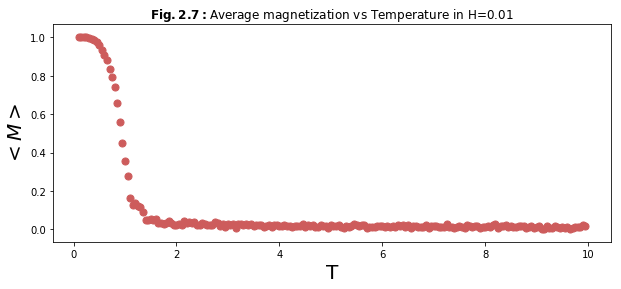

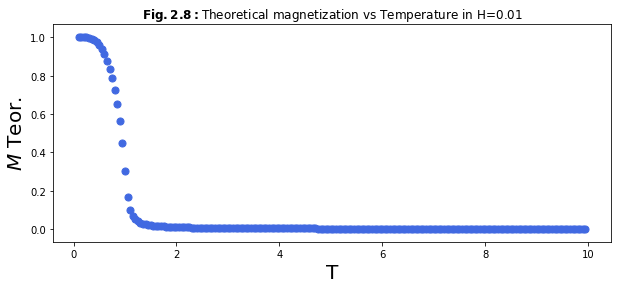

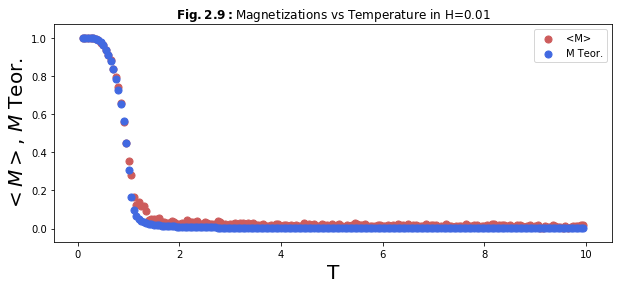

In [17]:
f = plt.figure(figsize=(10, 4));
T = np.arange(0.1, 10, 0.05); 
plt.scatter(T, AvMag, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$<M>$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.7:}$"+'Average magnetization vs Temperature in H=0.01')
plt.show()

f = plt.figure(figsize=(10, 4));
Magn2T=1
for i in range(500):
    Magn2T=np.tanh(1/T*J*Magn2T+1/T*H)
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$M$ Teor.", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.8:}$"+'Theoretical magnetization vs Temperature in H=0.01');
plt.show()

f = plt.figure(figsize=(10, 4));
plt.scatter(T, AvMag, s=50, marker='o', color='IndianRed',label='<M>')
plt.scatter(T, Magn2T, s=50, marker='o', color='RoyalBlue',label='M Teor.')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$<M>$, $M$ Teor.", fontsize=20);
plt.axis('tight');
plt.legend(loc="upper right");
plt.title(r"$\bf{Fig.2.9:}$"+'Magnetizations vs Temperature in H=0.01')
plt.show()

Once again, in the next $\bf{Fig.2.7}$ it is possible to see the average magnetization vs temperature obtained through the simulation, to be compared to $\bf{Fig.2.8}$ where we have the theoretical prediction of the magnetization vs temperature for the same H (now H=0.01).

Lastly in $\bf{Fig.2.9}$ I have placed both curves in the same plot, as we can see the transition is not as sharp in the simulation as it is predicted, this is once more an effect of non-infinite size and non-infinite time. It's not as evident as in the $\bf{Fig.2.3}$.

### Susceptibility vs Temperature

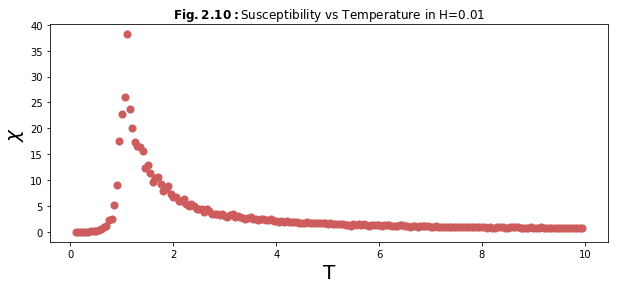

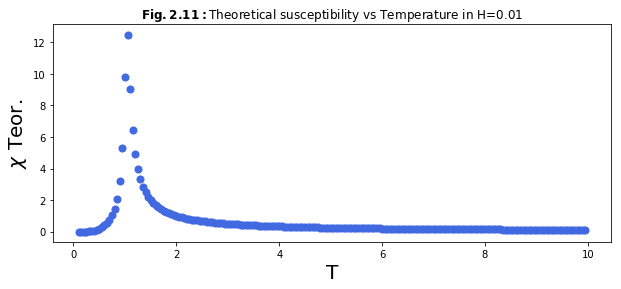

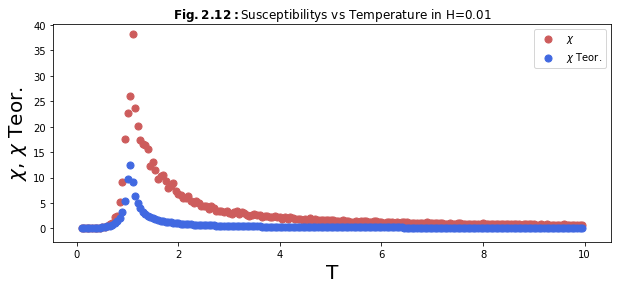

In [18]:
f = plt.figure(figsize=(10, 4));
plt.scatter(T, Suscp, s=50, marker='o', color='IndianRed')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$\chi$", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.10:}$"+'Susceptibility vs Temperature in H=0.01')
plt.show()

f = plt.figure(figsize=(10, 4));
SuscpT=1/T/(np.cosh(1/T*J*Magn2T+H/T)**2-J/T)
plt.scatter(T, SuscpT, s=50, marker='o', color='RoyalBlue')
plt.xlabel("T", fontsize=20); 
plt.ylabel("$\chi$ Teor.", fontsize=20);
plt.axis('tight');
plt.title(r"$\bf{Fig.2.11:}$"+'Theoretical susceptibility vs Temperature in H=0.01');
plt.show()

f = plt.figure(figsize=(10, 4));
plt.scatter(T, Suscp, s=50, marker='o', color='IndianRed',label='$\chi$')
plt.scatter(T, SuscpT, s=50, marker='o', color='RoyalBlue',label='$\chi$ Teor.')
plt.xlabel("T", fontsize=20);  
plt.ylabel("$\chi$, $\chi$ Teor.", fontsize=20);
plt.axis('tight');
plt.legend(loc="upper right");
plt.title(r"$\bf{Fig.2.12:}$"+'Susceptibilitys vs Temperature in H=0.01')
plt.show()

In the $\bf{Fig.2.10}$ I have plotted the susceptibility vs temperature for a H equal to zero. In the $\bf{Fig.2.11}$ we have the theoretical prediction, this two images are relative similar despite being a bit different near the critical temperature.

Finally in $\bf{Fig.2.11}$ I have both curves for comparison, once more we can see that the phase transition starts earlier (with less T, i.e. more to the left), that has more width (requires more T to restabilize after phase transition). All of this are effects of non-infinity size, and non-infinity time, like in the previous comparisons.